# Εργασία Αριθμητικής Ανάλυσης

Χατζηγρίβας Κωνσταντίνος 10552
Λιούτας Γιώργος          10974

## Συλλογή Δεδομένων

In [85]:
import yfinance as yfin

stock = yfin.Ticker("GOOG")
history = stock.history(start = "2025-04-28", end = "2025-05-03", interval="30m")
history['Open'].to_csv('open_prices.csv', header=True)

print(history['Open'].head())

Datetime
2025-04-28 09:30:00-04:00    164.130005
2025-04-28 10:00:00-04:00    162.809998
2025-04-28 10:30:00-04:00    161.979996
2025-04-28 11:00:00-04:00    162.524994
2025-04-28 11:30:00-04:00    161.309998
Name: Open, dtype: float64


## Πολυωνυμική Προσαρμογή Ελαχίστων Τετραγώνων

In [86]:
import numpy as np

def get_poly(x, y, degree):
	coeffs = np.polyfit(x, y, degree)
	poly = np.poly1d(coeffs)
	return poly

data = history['Open'].values
data_x = np.arange(len(data))

split_index = int(len(data_x) * 0.8)
data_x_train = data_x[:split_index]
data_x_test = data_x[split_index:]
data_train = data[:split_index]
data_test = data[split_index:]

poly1=get_poly(data_x_train, data_train, 1)
poly2=get_poly(data_x_train, data_train, 2)
poly3=get_poly(data_x_train, data_train, 3)

MAE1=0.0
MAE2=0.0
MAE3=0.0
MSE1=0.0
MSE2 =0.0
MSE3=0.0

for i in range(0, len(data_x_test)):
	MAE1 += np.abs(poly1(data_x_test[i]) - data_test[i])
	MAE2 += np.abs(poly2(data_x_test[i]) - data_test[i])
	MAE3 += np.abs(poly3(data_x_test[i]) - data_test[i])
	MSE1 += (poly1(data_x_test[i]) - data_test[i])**2
	MSE2 += (poly2(data_x_test[i]) - data_test[i])**2
	MSE3 += (poly3(data_x_test[i]) - data_test[i])**2

MAE1 /= len(data_test)
MAE2 /= len(data_test)
MAE3 /= len(data_test)
MSE1 /= len(data_test)
MSE2 /= len(data_test)
MSE3 /= len(data_test)

print(f"1ou bathmou: MAE:{MAE1:.4f}, MSE:{MSE1:.4f}")
print(f"2ou bathmou: MAE:{MAE2:.4f}, MSE:{MSE2:.4f}")
print(f"3ou bathmou: MAE:{MAE3:.4f}, MSE:{MSE3:.4f}")


1ou bathmou: MAE:4.1541, MSE:17.4627
2ou bathmou: MAE:0.8631, MSE:0.9966
3ou bathmou: MAE:3.0298, MSE:15.0282


Άρα το καλύτερο μοντέλο είναι αυτό του 2ου βαθμού, και αυτό θα χρησιμοποιούμε από εδώ και πέρα.

Τι συμβαίνει όταν χρησιμοποιούμε πολυώνυμα μεγάλου βαθμού;

Τα πολυώνυμα υψηλού βαθμού μπορούν να προσαρμοστούν πολύ καλά στο train set, ακόμα και αν έχουν θόρυβο. Συνεπώς, το μοντέλο μπορεί να ακολουθεί πιστά κάθε σημείο, αλλά να μην περιγράφει σωστά τη γενική συμπεριφορά των δεδομένων. Έτσι, όταν του δώσουμε νέα σημεία που δεν έχει «δει» πριν, κάνει λανθασμένες προβλέψεις.

Πώς το εντοπίζουμε και πώς το αντιμετωπίζουμε;

Μπορούμε να καταλάβουμε ότι υπάρχει υπερπροσαρμογή όταν το μοντέλο έχει πολύ καλές επιδόσεις στα δεδομένα εκπαίδευσης αλλά πολύ χειρότερες στα δεδομένα ελέγχου. Αυτό φαίνεται αριθμητικά αν συγκρίνουμε μετρικές σφάλματος όπως το MAE και το MSE σε training και test set. Αν υπάρχει μεγάλη διαφορά, τότε το μοντέλο πιθανόν να υπερπροσαρμόζει.

Για να περιορίσουμε την υπερπροσαρμογή:

- Χρησιμοποιούμε ξεχωριστά δεδομένα για εκπαίδευση και δοκιμή.

- Αποφεύγουμε να διαλέγουμε μοντέλα πολύ υψηλού βαθμού χωρίς λόγο.

- Δοκιμάζουμε διαφορετικούς βαθμούς και συγκρίνουμε τα σφάλματα, επιλέγοντας το μοντέλο που είναι πιο σταθερό και γενικεύει καλά.

## Πρόβλεψη επόμενης ημέρας

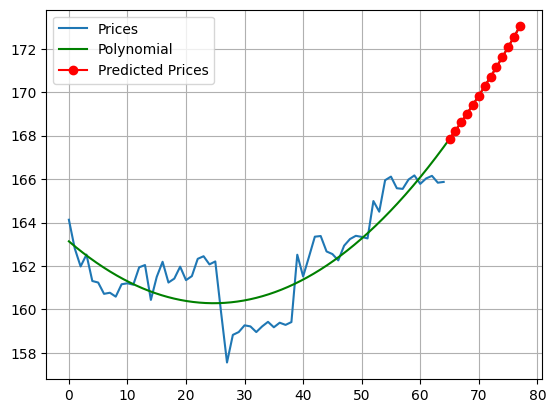

In [87]:
import matplotlib.pyplot as plot

x_pred = np.arange(len(data_x), len(data_x) + 13)
x_new = np.linspace(0, len(data_x) + 13 - 1, 1000)

if MAE1 <= MAE2 and MAE1 <= MAE3:
	y_pred = poly1(x_pred)
	y_new = poly1(x_new)
elif MAE2 <= MAE3 and MAE2 <= MAE1:
	y_pred = poly2(x_pred)
	y_new = poly2(x_new)
else:
	y_pred = poly3(x_pred)
	y_new = poly3(x_new)

plot.plot(data_x, data, label="Prices")
plot.plot(x_new, y_new, label="Polynomial", color='green')
plot.plot(x_pred, y_pred, label="Predicted Prices", color='red', marker='o')
plot.legend()
plot.grid(True)
plot.show()

Ενα χαμηλού βαθμού πολυώνυμο είναι απλό, γραμικό αλλα δεν μπορεί να ακολουθήσει κυρτά δεδομένα ενώ ένα μεγαλύτερου βαθμού μπορεί αλλά με τον κίνδυνο υπερπροσαρμογής.

Μπορούμε να δούμε αν είναι ασταθής από το γράφημα, αν ανεβοκατεβαίνει πίο ακραία απότι θα ήταν λογικό.

## Ολοκλήρωση της καμπύλης τιμών για μέση τιμή

In [88]:
def trap_area(y, h = 1):
	area = 0
	for i in range(len(y) - 1):
		area += (y[i] + y[i + 1]) * h / 2
	return area

def simp_area(y):
	n = len(y)

	s = y[0] + y[n - 1]

	for i in range(1, n - 1):
		if i % 2 == 0:
			s += 2 * y[i]
		else:
			s += 4 * y[i]

	area = (1 / 3) * s
	return area

def get_area(poly, step, start, stop):
	x = np.linspace(start, stop, step)
	y = poly(x)
	h = (stop - start) / (step - 1)
	a = trap_area(y, h)
	a /= (stop - start)
	return a

a_simp = simp_area(data)
a_trap = trap_area(data)
m_simp = a_simp / len(data)
m_trap = a_trap / len(data)

print(f"Trapezoid: Area:{a_trap} Mean:{m_trap}")
print(f"Simpson: Area:{a_simp} Mean:{m_simp}")
print()
print(f"Degree 1 Area:{get_area(poly1, 100, 0, len(data))}")
print(f"Degree 2 Area:{get_area(poly2, 100, 0, len(data))}")
print(f"Degree 3 Area:{get_area(poly3, 100, 0, len(data))}")

Trapezoid: Area:10379.198280334473 Mean:159.67997354360728
Simpson: Area:10379.928207397461 Mean:159.69120319073016

Degree 1 Area:161.39125345842868
Degree 2 Area:162.21101086272063
Degree 3 Area:162.9137687396264


Όσο πιο μικρό το βήμα, τόσο πιο μεγάλυ η ακρίβεια του εμβαδόν. Αυτό γιατί με το μικρότερο βήμα τίνει προς την ίδια την συνάρτηση, μόνο και μόνο, γιατί είναι μικρότερο το σφάλμα που μετράει εκτός της συνάρτησης.

In [89]:
def aitken(x, y, val):
	arr = [[0 for _ in range(len(x))] for _ in range(len(x))]

	for i in range(len(x)):
		arr[i][0] = y[i]
	
	for j in range(1, len(x)):
		for i in range(j, len(x)):
			arr[i][j] = ((x[j - 1] - val) * arr[i][j - 1] - (x[i] - val) * arr[j - 1][j - 1]) / (x[j - 1] - x[i])
	
	return arr[len(x) - 1][len(x) - 1]

def n_divided(x, y, val):
	arr = [[0 for _ in range(len(x))] for _ in range(len(x))]

	for i in range(len(x)):
		arr[i][0] = y[i]

	for j in range(1, len(x)):
		for i in range(len(x) - j):
			arr[i][j] = (arr[i+1][j-1]-arr[i][j-1]) / (x[i+j]-x[i])
	
	coef = []
	for i in range(len(x)):
		coef.append(arr[0][i])

	r = coef[0]
	p = 1.0
	for i in range(1, len(coef)):
		p *= (val - x[i - 1])
		r += coef[i] * p
	return r

print("Prediction Values:")
for i in range(0, len(data_x) - 5, 5):
	new_x = data_x[i:i + 5]
	new_y = data[i:i + 5]
	x_targ = data_x[i + 5]
	y_targ = data[i + 5]
	aitken_res = aitken(new_x, new_y, x_targ)
	newton = n_divided(new_x, new_y, x_targ)

	print(f"x:{x_targ:2d}, y:{y_targ:.2f} -> Aitken:{aitken_res:.2f} Netwon:{newton:.2f} Aitken diff:{np.abs(aitken_res - y_targ):5.2f} Newton diff:{np.abs(newton - y_targ):5.2f}")

Prediction Values:
x: 5, y:161.24 -> Aitken:151.18 Netwon:151.18 Aitken diff:10.06 Newton diff:10.06
x:10, y:161.21 -> Aitken:165.24 Netwon:165.24 Aitken diff: 4.04 Newton diff: 4.04
x:15, y:161.50 -> Aitken:156.66 Netwon:156.66 Aitken diff: 4.84 Newton diff: 4.84
x:20, y:161.35 -> Aitken:158.58 Netwon:158.58 Aitken diff: 2.77 Newton diff: 2.77
x:25, y:162.21 -> Aitken:162.85 Netwon:162.85 Aitken diff: 0.64 Newton diff: 0.64
x:30, y:159.27 -> Aitken:145.11 Netwon:145.11 Aitken diff:14.16 Newton diff:14.16
x:35, y:159.18 -> Aitken:157.72 Netwon:157.72 Aitken diff: 1.46 Newton diff: 1.46
x:40, y:161.52 -> Aitken:173.53 Netwon:173.53 Aitken diff:12.01 Newton diff:12.01
x:45, y:162.55 -> Aitken:162.45 Netwon:162.45 Aitken diff: 0.10 Newton diff: 0.10
x:50, y:163.34 -> Aitken:165.15 Netwon:165.15 Aitken diff: 1.81 Newton diff: 1.81
x:55, y:166.12 -> Aitken:181.64 Netwon:181.64 Aitken diff:15.53 Newton diff:15.53
x:60, y:165.78 -> Aitken:164.77 Netwon:164.77 Aitken diff: 1.01 Newton diff: 1.